In [ ]:
import os
os.mkdir("data")

In [ ]:
# mount your gdrive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#required librairies to extract .7z
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 2.3MB/s 


In [ ]:
from pyunpack import Archive
Archive('/content/drive/My Drive/data/final/data_total_split_updated.7z').extractall('/content/data' )

In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 27kB/s 
     |████████████████████████████████| 6.6MB 16.8MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 276kB 2.6MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=c67ad128353bb6b8967c8e93a9d9d211f5df313d673c15dfae55be53858e4741
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip

In [ ]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 688kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20200912-cp36-none-any.whl size=43996 sha256=39335b2f74408daaa43d173188f32130a03be492118b40632b26dc3c7d50322a
  Stored in directory: /root/.cache/pip/wheels/34/41/7b/f0a0b5800bea0474ae553342bde52093fdd5852764463aa2ec
Successfully built fvcore


In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger

import detectron2
from detectron2.utils.logger import setup_logger
#setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
import os
import datetime
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

# create the output dir for the trained model
output_dir = os.path.join("/content/drive/My Drive/output", "20200901T1306")
# change the config in the .yaml document
print(output_dir)

/content/drive/My Drive/output/20200901T1306


In [ ]:

# Register a dataset in COCO’s json annotation format for instance detection, instance segmentation and keypoint detection. 
from detectron2.data.datasets import register_coco_instances
register_coco_instances("myDataset_train", {}, "/content/data/data_total_split_updated/train/train_coco.json", "/content/data/data_total_split_updated/train")
register_coco_instances("myDataset_val", {}, "/content/data/data_total_split_updated/val/val_coco.json", "/content/data/data_total_split_updated/val")
#register the test dataset
register_coco_instances("myDataset_test", {}, "/content/data/data_total_split_updated/test/test_coco.json", "/content/data/data_total_split_updated/test")


In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog

papers_metadata = MetadataCatalog.get("myDataset_train") #return the Metadata instance associated with this name
dataset_dicts = DatasetCatalog.get("myDataset_train") # Call the registered function and return dataset annotations


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [ ]:
cfg = get_cfg() #load default config
cfg.merge_from_file(output_dir + "/train_config.yaml")
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.70  # set the testing threshold for this model
cfg.DATASETS.TEST = ("myDataset_val", )
predictor = DefaultPredictor(cfg)

[09/14 21:08:44 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

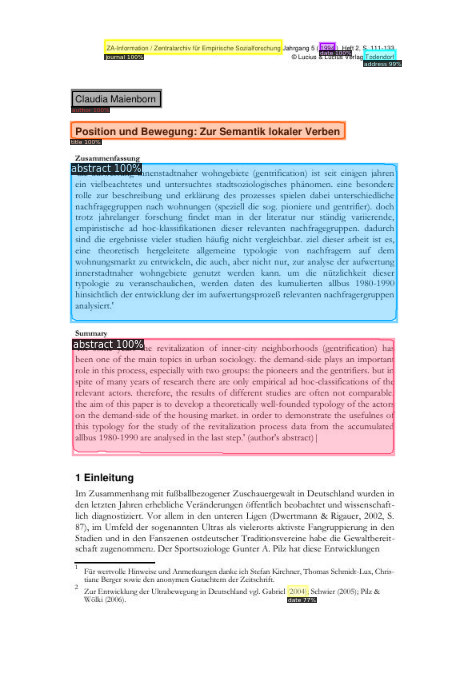

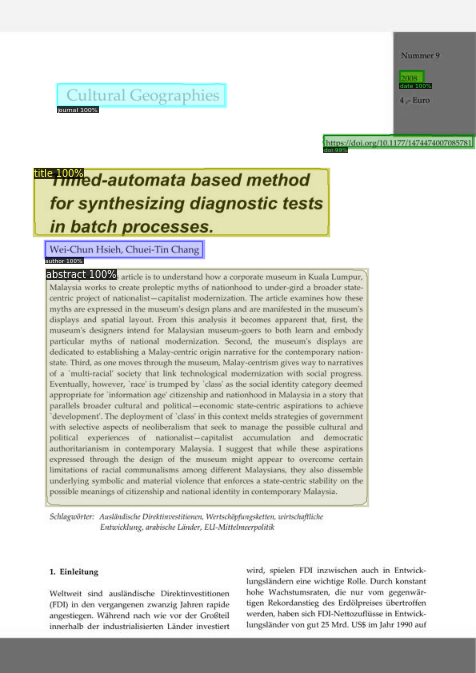

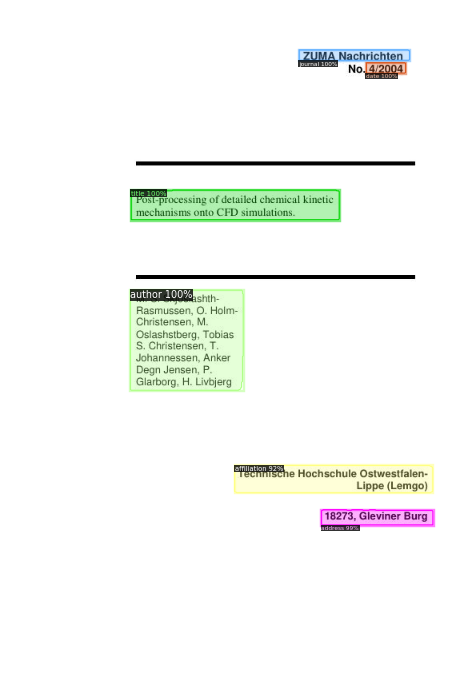

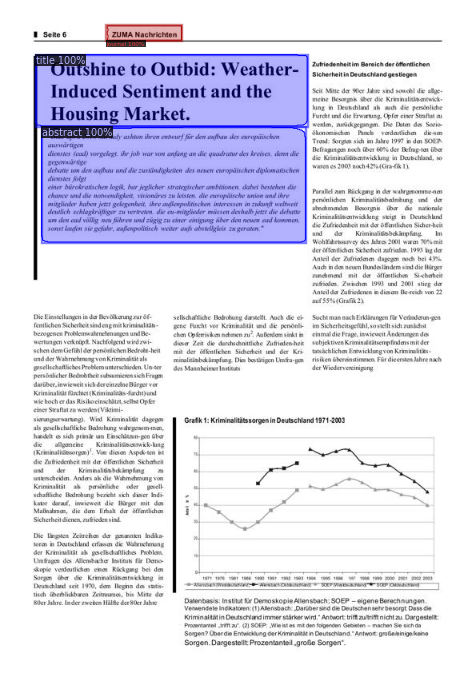

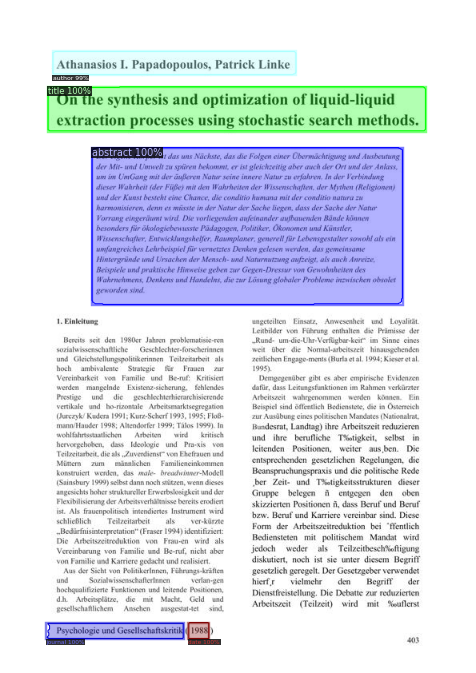

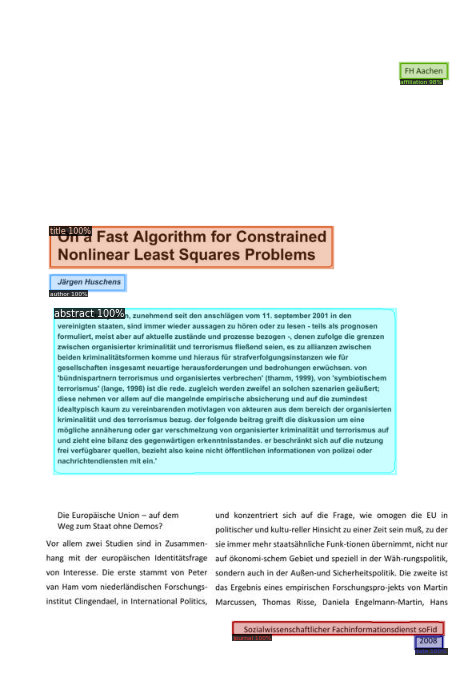

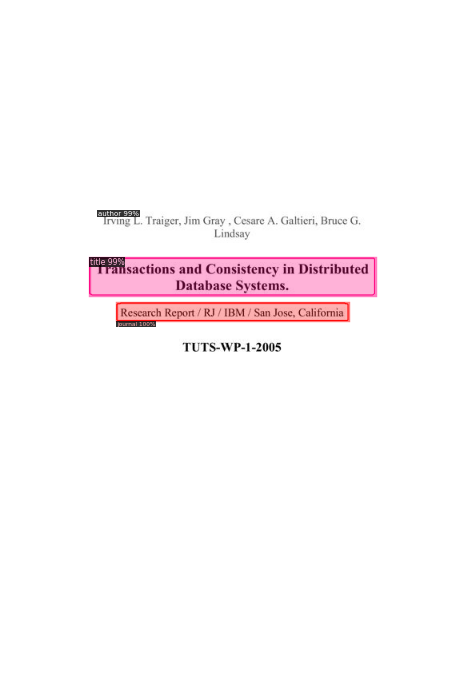

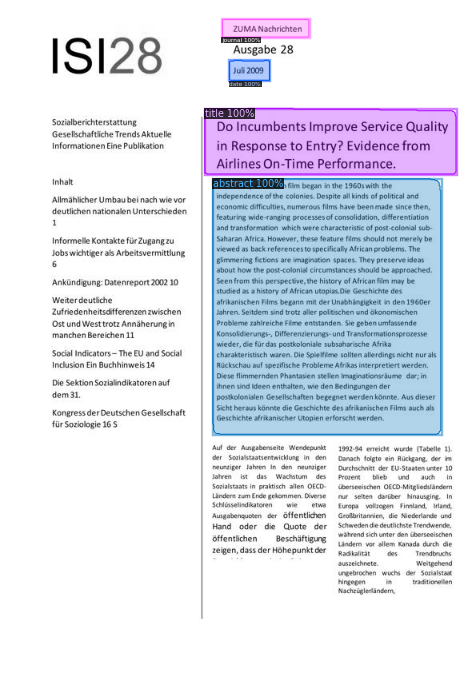

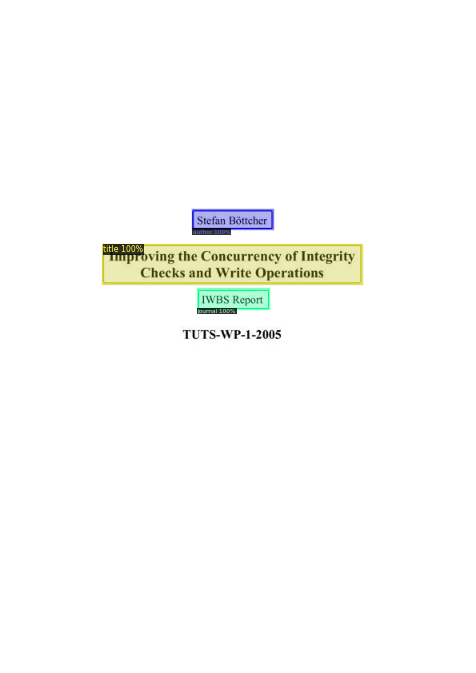

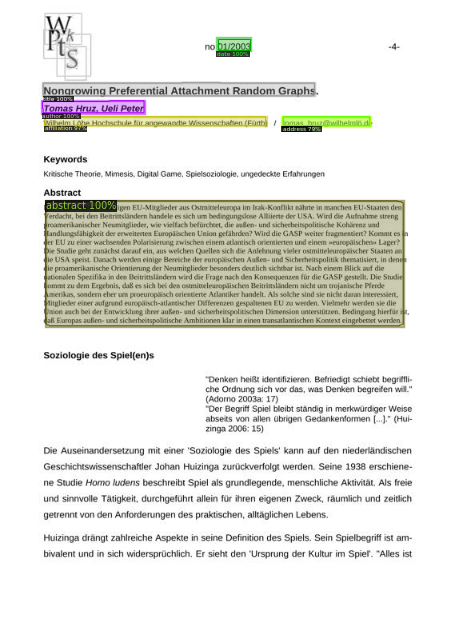

In [ ]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

from detectron2.utils.visualizer import ColorMode
dataset_dicts_val = DatasetCatalog.get("myDataset_val")
for d in random.sample(dataset_dicts_val, 10):   
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=papers_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("myDataset_val", cfg, False, output_dir=output_dir)
val_loader = build_detection_test_loader(cfg, "myDataset_val")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [09/14 21:09:02 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/14 21:09:02 d2.data.datasets.coco]: Loaded 6577 images in COCO format from /content/data/data_total_split_updated/val/val_coco.json
[09/14 21:09:02 d2.data.common]: Serializing 6577 elements to byte tensors and concatenating them all ...
[09/14 21:09:02 d2.data.common]: Serialized dataset takes 6.60 MiB
[09/14 21:09:02 d2.evaluation.evaluator]: Start inference on 6577 images
[09/14 21:09:04 d2.evaluation.evaluator]: Inference done 11/6577. 0.1031 s / img. ETA=0:12:19
[09/14 21:09:09 d2.evaluation.evaluator]: Inference done 55/6577. 0.1036 s / img. ETA=0:12:21
[09/14 21:09:14 d2.evaluation.evaluator]: Inference done 100/6577. 0.1035 s / img. ETA=0:12:13
[09/14 21:09:19 d2.evaluation.evaluator]: Inference done 144/6577. 0.1036 s / img. ETA=0:12:09
[09/14 21:09:24 d2.evaluation.evaluator]: Inference done 189/6577. 0.1036 s / img. ETA=0:12:02
[09/14 

OrderedDict([('bbox',
              {'AP': 90.3630489018087,
               'AP-abstract': 97.36342902515302,
               'AP-address': 89.06634050006555,
               'AP-affiliation': 88.805291092503,
               'AP-author': 92.07590603455658,
               'AP-date': 80.96140477857526,
               'AP-doi': 95.02659793292146,
               'AP-email': 87.0346131962941,
               'AP-journal': 87.57369074255558,
               'AP-title': 95.36016681365375,
               'AP50': 95.82849384615447,
               'AP75': 95.26929019503315,
               'APl': 95.27349175647466,
               'APm': 81.52314271186336,
               'APs': 74.17333864403281}),
             ('segm',
              {'AP': 85.69324779304876,
               'AP-abstract': 97.68080639360046,
               'AP-address': 81.06400853402819,
               'AP-affiliation': 81.78320334742564,
               'AP-author': 86.03766454873623,
               'AP-date': 75.16472045333069,
     

Making predictions on the test set

[09/14 21:22:05 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

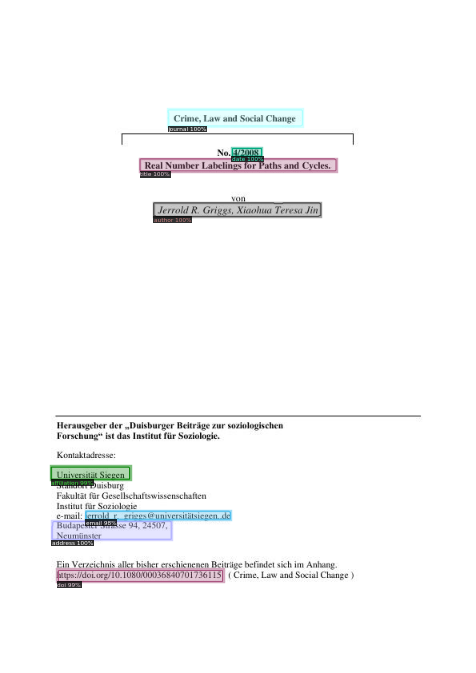

/content/data/data_total_split_updated/test/21375_188


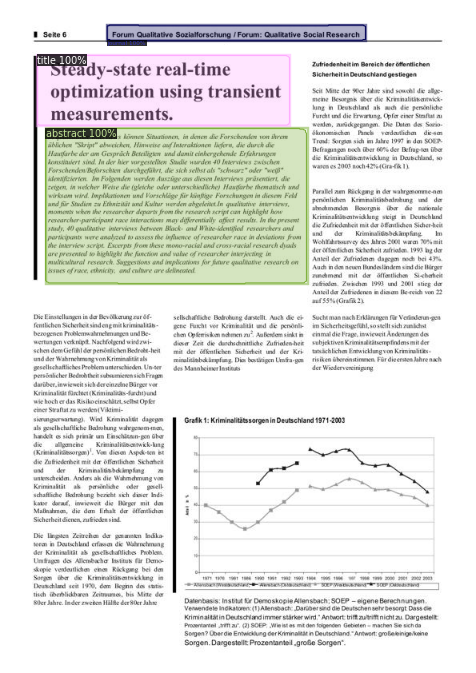

/content/data/data_total_split_updated/test/4336_538


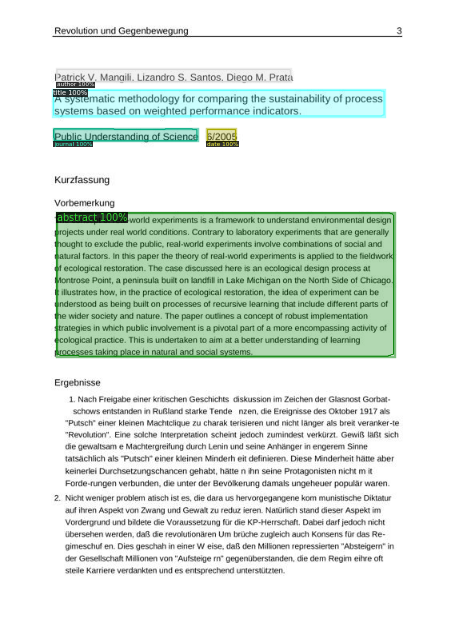

/content/data/data_total_split_updated/test/6041_1446


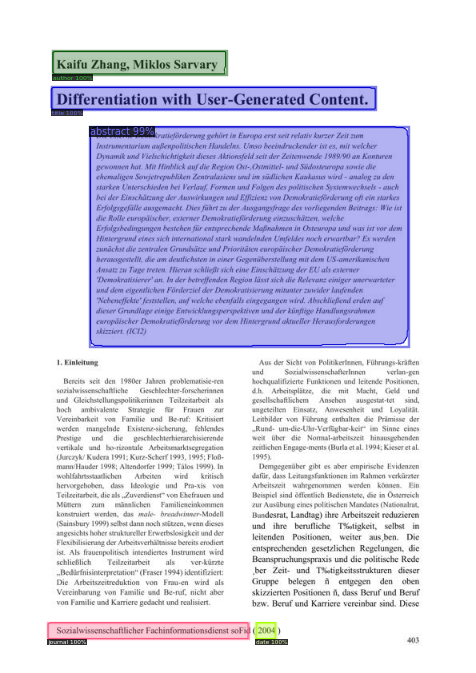

/content/data/data_total_split_updated/test/11916_644


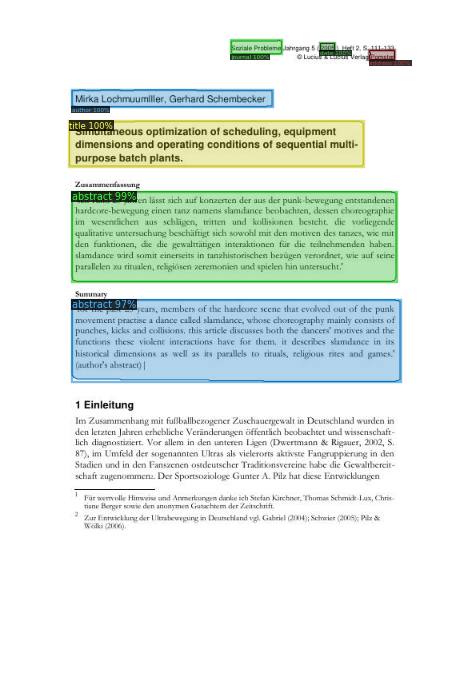

/content/data/data_total_split_updated/test/40890_16


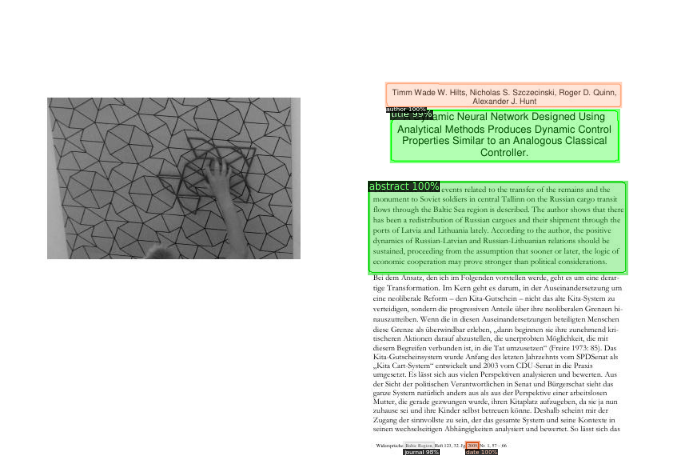

/content/data/data_total_split_updated/test/44475_257


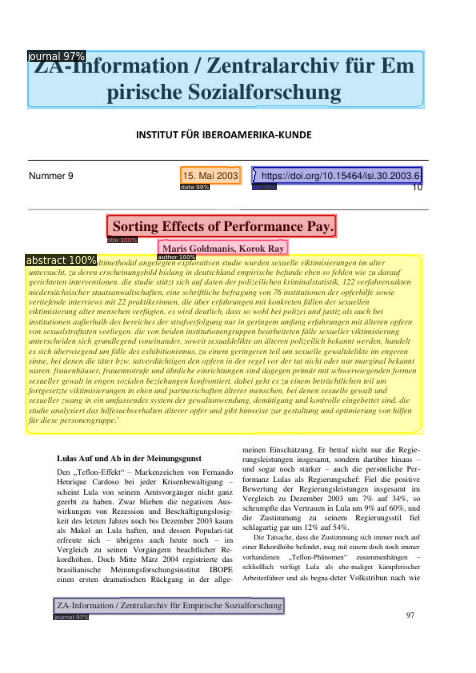

/content/data/data_total_split_updated/test/11413_1042


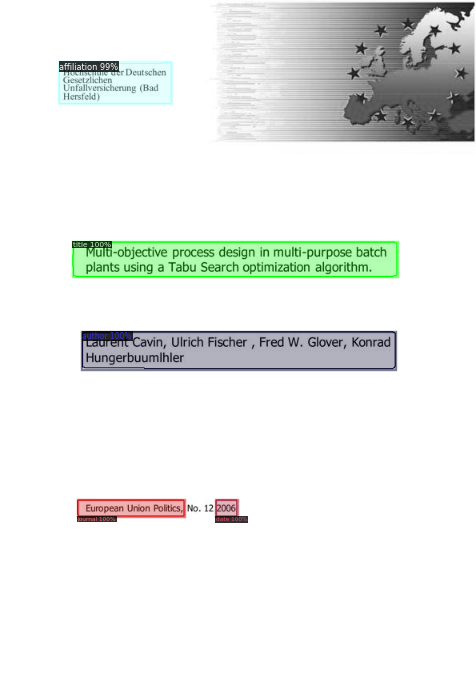

/content/data/data_total_split_updated/test/27787_660


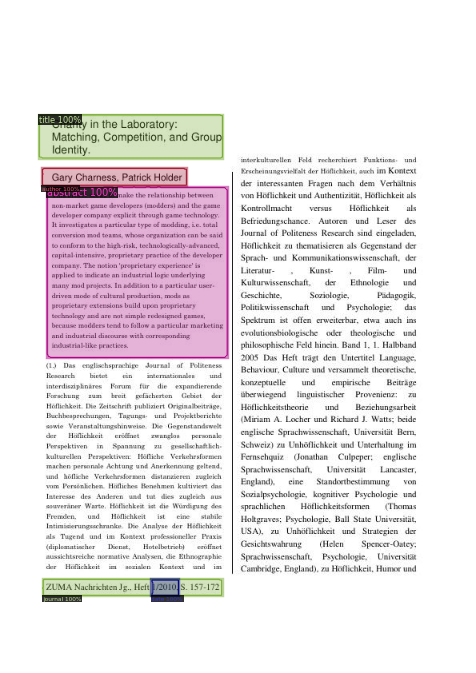

/content/data/data_total_split_updated/test/12715_768


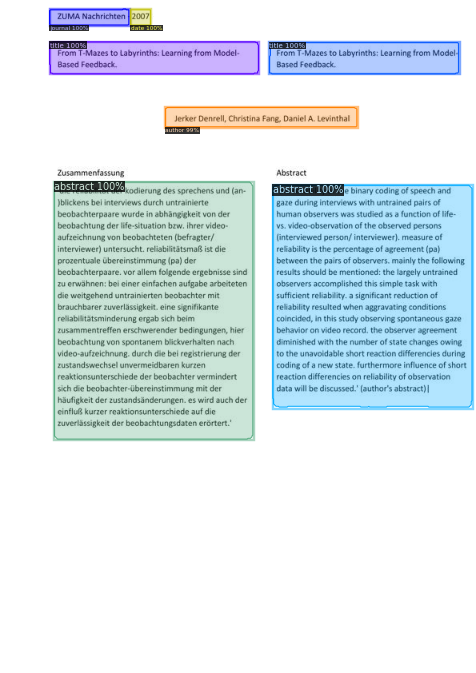

In [ ]:
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

from detectron2.utils.visualizer import ColorMode
dataset_dicts_test = DatasetCatalog.get("myDataset_test")
for d in random.sample(dataset_dicts_test, 10):      
    im = cv2.imread(d["file_name"])
    print(d["file_name"][:-5])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=papers_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2.imwrite(d["file_name"][:-5] + "_test.png", v.get_image()[:, :, ::-1])
    cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("myDataset_test", cfg, False, output_dir=output_dir)
val_loader = build_detection_test_loader(cfg, "myDataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)
# another equivalent way is to use trainer.test

WARNING [09/14 21:24:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/14 21:24:28 d2.data.datasets.coco]: Loaded 6569 images in COCO format from /content/data/data_total_split_updated/test/test_coco.json
[09/14 21:24:29 d2.data.common]: Serializing 6569 elements to byte tensors and concatenating them all ...
[09/14 21:24:29 d2.data.common]: Serialized dataset takes 6.58 MiB
[09/14 21:24:29 d2.evaluation.evaluator]: Start inference on 6569 images
[09/14 21:24:30 d2.evaluation.evaluator]: Inference done 11/6569. 0.1038 s / img. ETA=0:12:41
[09/14 21:24:35 d2.evaluation.evaluator]: Inference done 56/6569. 0.1041 s / img. ETA=0:12:20
[09/14 21:24:40 d2.evaluation.evaluator]: Inference done 101/6569. 0.1042 s / img. ETA=0:12:13
[09/14 21:24:45 d2.evaluation.evaluator]: Inference done 145/6569. 0.1043 s / img. ETA=0:12:09
[09/14 21:24:51 d2.evaluation.evaluator]: Inference done 190/6569. 0.1043 s / img. ETA=0:12:04
[09/1

OrderedDict([('bbox',
              {'AP': 90.16719707575113,
               'AP-abstract': 97.5669421993128,
               'AP-address': 89.25665395614581,
               'AP-affiliation': 87.69428121200157,
               'AP-author': 91.79641395099442,
               'AP-date': 80.98840396058328,
               'AP-doi': 94.57342974916834,
               'AP-email': 85.93759374338428,
               'AP-journal': 87.9304949786842,
               'AP-title': 95.76055993148546,
               'AP50': 95.62551500496771,
               'AP75': 94.91121352387597,
               'APl': 79.22532174051608,
               'APm': 81.27455833544504,
               'APs': 75.19882452087454}),
             ('segm',
              {'AP': 85.50341936613549,
               'AP-abstract': 97.81359647400765,
               'AP-address': 80.99001061517876,
               'AP-affiliation': 80.85640685709478,
               'AP-author': 85.72359043500452,
               'AP-date': 75.20745492175051,
   